In [1]:
import numpy as np
import pickle
from src.load_results import *
from src.plot_tools import *
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

#plt.rc('text', usetex=True)
plt.rc('font', family='serif')

FONTSIZE = 20

%matplotlib inline
nb_average = 4
plot_option = "print_and_save" ## "print" or "save" or "print_and_save"

/home/beubeu/anaconda3/lib/python3.4/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


##### MT-intra and iigand-ased ST

In [12]:
list_type_of_SingleTask_ST = ['MolView','Kron']
list_type_clf_ST = ['SVM']
list_NbNeg_ST = ['1', '2', '5', '10', '50', 'full']

dico_auc_type_SingleTask_ST, dico_auc_stdev_type_SingleTask_ST, dico_aupr_type_SingleTask_ST ,\
dico_aupr_stdev_type_SingleTask_ST = load_ST_results(list_type_of_SingleTask_ST, list_type_clf_ST, list_NbNeg_ST)


[0.91437944011975092, 0.91796646698256124, 0.92321328154473314, 0.92701611175006149, 0.92312740427700024, 0.89087773987877306]
[0.94892787925349609, 0.95075430752926038, 0.95399461656251183, 0.95538944531564785, 0.95223268576764275, 0.94757814501892934]


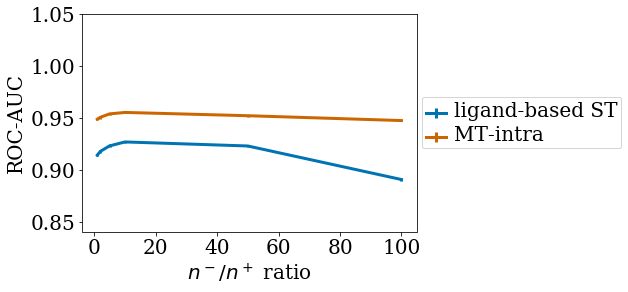

[0.91023287788266272, 0.91394083722955188, 0.92200700718932849, 0.92840465161967023, 0.93430422481478015, 0.91622045711745526]
[0.94191962446792488, 0.94723785661532467, 0.95190341044345139, 0.95492285598383186, 0.95590046952307428, 0.95290114447624674]


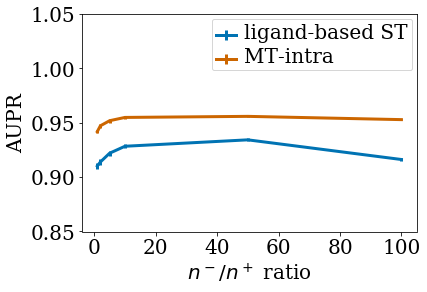

In [13]:
for type_clf in list_type_clf_ST:
        
    list_auc = []
    list_auc_stdev = []
    list_aupr = []
    list_aupr_stdev = []

    list_name = []
    for type_of_SingleTask in list_type_of_SingleTask_ST:
        if type_of_SingleTask=='Kron':
            list_name.append(r'MT-intra')
        elif type_of_SingleTask=='MolView':
            list_name.append(r'ligand-based ST')

        list_auc.append(dico_auc_type_SingleTask_ST[type_of_SingleTask][type_clf])
        list_auc_stdev.append(dico_auc_stdev_type_SingleTask_ST[type_of_SingleTask][type_clf])
        list_aupr.append(dico_aupr_type_SingleTask_ST[type_of_SingleTask][type_clf])
        list_aupr_stdev.append(dico_aupr_stdev_type_SingleTask_ST[type_of_SingleTask][type_clf])
    
    #dico_plot = {'pp':None, 'f_out':None}
    #if plot_option=="save" or plot_option=="print_and_save":
    #    dico_plot['pp'] = PdfPages("saved_results/plots/ST/ST_"+type_clf+"_AUC_depending_on_ST.pdf")
    #    dico_plot['f_out'] = open("saved_results/plots/ST/ST_"+type_clf+"_AUC_depending_on_ST.txt",'w')
    #legend = plot_score_curve('', list_auc, list_auc_stdev, list_NbNeg_ST, r"ROC-AUC", r"$n^-/n^+$ ratio", list_name, "", plot_option, **dico_plot)
    #plt.yticks(np.arange(0.85, 1.05, 0.05))
    #if plot_option=="save" or plot_option=="print_and_save":
    #    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    #    dico_plot['pp'].close()
    #    dico_plot['f_out'].close()
    #if plot_option=="print" or plot_option=="print_and_save":
    #    plt.show()
    #plt.clf()
        
    dico_plot = {'pp':None, 'f_out':None}
    if plot_option=="save" or plot_option=="print_and_save":
        dico_plot['pp'] = PdfPages("saved_results/plots/ST/ST_"+type_clf+"_AUPR_depending_on_ST.pdf")
        dico_plot['f_out'] = open("saved_results/plots/ST/ST_"+type_clf+"_AUPR_depending_on_ST.txt",'w')
    legend = plot_score_curve('', list_aupr, list_aupr_stdev, list_NbNeg_ST, r'AUPR', r"$n^-/n^+$ ratio", list_name, '', plot_option, **dico_plot)
    plt.yticks(np.arange(0.85, 1.05, 0.05))
    legend = plt.legend(loc='upper right', bbox_to_anchor=(1,1))
    # Set the fontsize
    for label in legend.get_texts():
        label.set_fontsize(FONTSIZE)
    legend.get_title().set_fontsize(FONTSIZE)
    if plot_option=="save" or plot_option=="print_and_save":
        plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
        dico_plot['pp'].close()
        dico_plot['f_out'].close()
    if plot_option=="print" or plot_option=="print_and_save":
        plt.show()
    plt.clf()

##### NNMT and RNMT

In [14]:
nb_average = 4

list_script_MT = ['MultiNeerestNeiLOOCV', 'MultiRandomNeiLOOCV']
list_type_of_SingleTask_MT = ['MolView', 'Kron']
list_type_of_clf_MT = ['SVM']
list_NbNeg_MT = ['10']
list_nb_pos = ['0','1','5', '10', '50']
list_nb_neg = ['1','2','5','10']

#### temporary
#list_type_of_SingleTask_MT = ['Kron']
#list_nb_pos = ['ST','0','1','5', '10', '50', '100', '200']


list_type_of_SingleTask_MT = ['Kron']

dico_auc_type_SingleTask_MT, dico_auc_stdev_type_SingleTask_MT,\
dico_aupr_type_SingleTask_MT, dico_aupr_stdev_type_SingleTask_MT =\
load_MT_results(list_script_MT, list_type_of_SingleTask_MT, list_type_of_clf_MT, list_NbNeg_MT, list_nb_pos, list_nb_neg )



[0.95538944531564785, 0.95538944531564785, 0.95538944531564785, 0.95538944531564785]
[0.95829721092408127, 0.95813005465432732, 0.95726156258981665, 0.95617022653606709]
[0.96092308565460283, 0.9601097799410413, 0.95776646935475074, 0.95541235785772272]
[0.96151879026132603, 0.96020014087596361, 0.95778052199856156, 0.95563386963913843]
[0.95865359800396877, 0.9584778468450339, 0.95710648213936189, 0.95493879378866842]


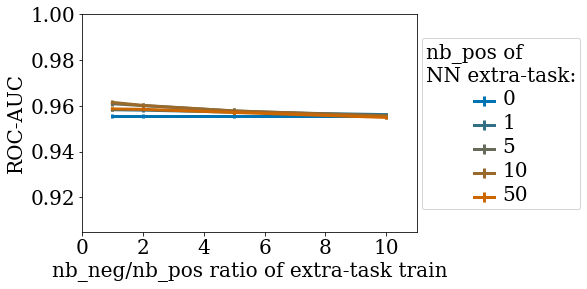

[0.95492285598383186, 0.95492285598383186, 0.95492285598383186, 0.95492285598383186]
[0.95794475087179243, 0.95818719197889701, 0.95781009120184768, 0.95693427053763536]
[0.9609342447402307, 0.96047396299568211, 0.95867055842120963, 0.95699196909528983]
[0.96204831833968807, 0.96108828519331313, 0.95927044442695686, 0.95702380410386545]
[0.96182907127597272, 0.96182999888903153, 0.9600273906560699, 0.95754455433140162]


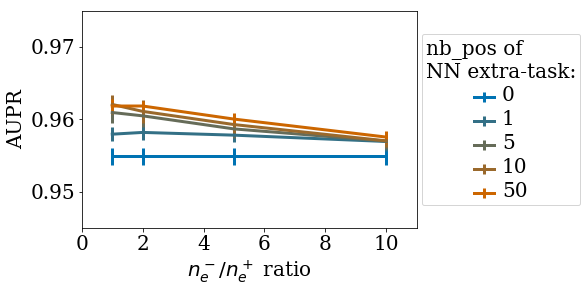

[0.95538944531564785, 0.95538944531564785, 0.95538944531564785, 0.95538944531564785]
[0.95683052173498495, 0.95664341099751593, 0.95609986304330585, 0.95525749227949752]
[0.95989567408913656, 0.95922319563480474, 0.95738108884869277, 0.95480579504100105]
[0.96119951877788468, 0.96019883731777111, 0.95756913069915639, 0.95415575640983918]
[0.95756491204105021, 0.95665152600538439, 0.95421037693058397, 0.95129395197130084]


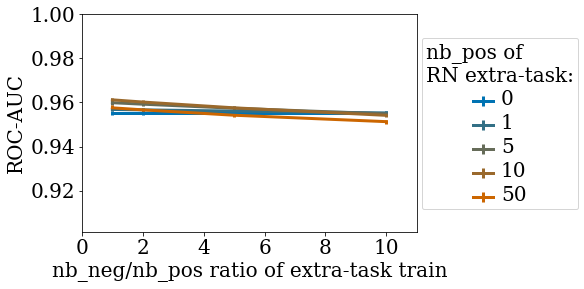

[0.95492285598383186, 0.95492285598383186, 0.95492285598383186, 0.95492285598383186]
[0.95646960339342968, 0.95634157364462646, 0.95594296681602853, 0.95535647971669302]
[0.95888695914997712, 0.95834903955978912, 0.95692652295418257, 0.95516268309841412]
[0.96016561524024957, 0.95930847260230823, 0.95720986513927919, 0.95481372947009158]
[0.9585564324760778, 0.95756893370079732, 0.95548628990354056, 0.95332812798598143]


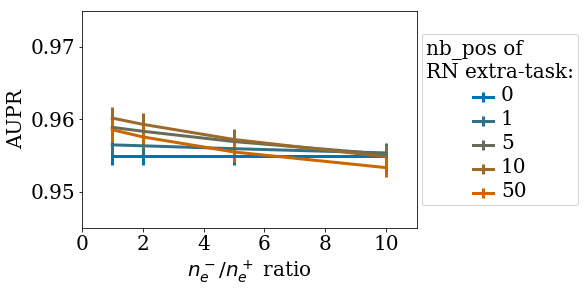

In [24]:
for type_clf in list_type_of_clf_MT:
    for type_of_SingleTask in list_type_of_SingleTask_MT:
        for script in list_script_MT:
            for NbNeg in list_NbNeg_MT:
                list_of_list_of_auc_local = []
                list_of_list_of_auc_local_stdev = []
                list_of_list_of_aupr_local = []
                list_of_list_of_aupr_local_stdev = []
                #print(list_nb_pos)
                if script=='MultiNeerestNeiLOOCV':
                    add_title = 'NN'
                else:
                    add_title = 'RN'
                legend_title = 'nb_pos of\n'+add_title+' extra-task:'
                list_name = []
                for nb_pos in list_nb_pos:
                    if nb_pos=='ST':
                        list_name.append('0')
                    else:
                        list_name.append(nb_pos)
                    list_of_list_of_auc_local.append(dico_auc_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos])
                    list_of_list_of_auc_local_stdev.append(dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos])
                    list_of_list_of_aupr_local.append(dico_aupr_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos])
                    list_of_list_of_aupr_local_stdev.append(dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos])
                
                #dico_plot = {'pp':None, 'f_out':None}
                #if plot_option=="save" or plot_option=="print_and_save":
                #    dico_plot['pp'] = PdfPages('saved_results/plots/ST/'+script+'_NbNeg='+str(NbNeg)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_NbNegInTain.pdf')
                #    dico_plot['f_out'] = open('saved_results/plots/ST/'+script+'_NbNeg='+str(NbNeg)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_NbNegInTain.txt','w')
                #legend = plot_score_curve('', list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, \
                #                 list_nb_neg, 'ROC-AUC', 'nb_neg/nb_pos ratio of extra-task train', \
                #                 list_name, legend_title, plot_option, **dico_plot)
                #if plot_option=="save" or plot_option=="print_and_save":
                #    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                #    dico_plot['pp'].close()
                #    dico_plot['f_out'].close()
                #if plot_option=="print" or plot_option=="print_and_save":
                #    plt.show()
                
                dico_plot = {'pp':None, 'f_out':None}
                if plot_option=="save" or plot_option=="print_and_save":
                    dico_plot['pp'] = PdfPages('saved_results/plots/ST/'+script+'_NbNeg='+str(NbNeg)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_NbNegInTain.pdf')
                    dico_plot['f_out'] = open('saved_results/plots/ST/'+script+'_NbNeg='+str(NbNeg)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_NbNegInTain.txt','w')
                legend = plot_score_curve('', list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, \
                                 list_nb_neg, r'AUPR', r"$n_e^-/n_e^+$ ratio", \
                                 list_name, legend_title, plot_option, **dico_plot)
                plt.yticks(np.arange(0.95, 0.98, 0.01))
                plt.ylim([0.945,0.975])
                if plot_option=="save" or plot_option=="print_and_save":
                    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                    dico_plot['pp'].close()
                    dico_plot['f_out'].close()
                if plot_option=="print" or plot_option=="print_and_save":
                    plt.show()


##### MT-intra and ligand-based ST : on reduced training sets

In [8]:
nb_average = 4

list_type_of_SingleTask_ST = ['Kron', 'MolView']
list_type_clf_ST = ['SVM']
list_NbNeg_ST = ['1', '2', '10', '50']
list_type_threshold = ['Sd']
list_threshold = ['20','30','50','80']

dico_auc_type_SingleTask_ST, dico_auc_stdev_type_SingleTask_ST, dico_aupr_type_SingleTask_ST ,\
dico_aupr_stdev_type_SingleTask_ST = load_STminus_results(list_type_of_SingleTask_ST, list_type_clf_ST, list_NbNeg_ST, list_type_threshold, list_threshold)



[0.66367980106800895, 0.66899735689739992, 0.67187313471362509, 0.6733904084072988]
[0.70414394615282605, 0.70865894839525656, 0.71649215491675866, 0.71629701269293067]
[0.72296930549821314, 0.725247253161039, 0.73794831527457405, 0.73777158764510653]
[0.7554693418718903, 0.76463056301892496, 0.77829391687387828, 0.77487818220602256]


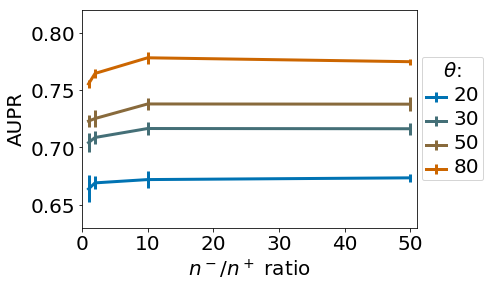

[0.66002759328342864, 0.65843877358645964, 0.6961873883902614, 0.72240354579698662]
[0.64864895054648009, 0.65870805245271757, 0.70041886507844953, 0.72304441000826891]
[0.67114145288503024, 0.67352902300772899, 0.71280890983892153, 0.73085151044079089]
[0.69128847386371395, 0.70184386540292132, 0.74089225289530813, 0.75774068013366136]


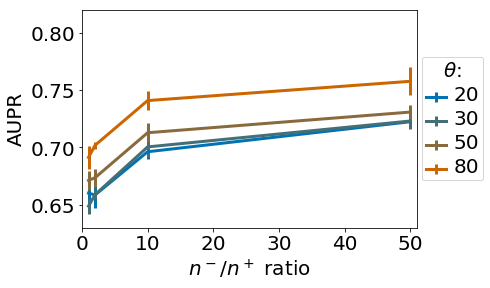

In [12]:
type_threshold = 'Sd'
for ST_type in list_type_of_SingleTask_ST:
    list_of_list_of_auc_local = []
    list_of_list_of_auc_local_stdev = []
    list_of_list_of_aupr_local = []
    list_of_list_of_aupr_local_stdev = []
    for threshold in list_threshold:
        list_of_list_of_auc_local.append(dico_auc_type_SingleTask_ST[ST_type]['SVM'][type_threshold][threshold])
        list_of_list_of_auc_local_stdev.append(dico_auc_stdev_type_SingleTask_ST[ST_type]['SVM'][type_threshold][threshold])
        list_of_list_of_aupr_local.append(dico_aupr_type_SingleTask_ST[ST_type]['SVM'][type_threshold][threshold])
        list_of_list_of_aupr_local_stdev.append(dico_aupr_stdev_type_SingleTask_ST[ST_type]['SVM'][type_threshold][threshold])

    #dico_plot = {'pp':None, 'f_out':None}
    #if plot_option=="save" or plot_option=="print_and_save":
    #    dico_plot['pp'] = PdfPages("saved_results/plots/ST/STMinus_"+ST_type+"_AUC_depending_on_threshold.pdf")
    #    dico_plot['f_out'] = open("saved_results/plots/ST/STMinus_"+type_clf+"_AUC_depending_on_threshold.txt",'w')
    #legend = plot_score_curve(ST_type+': AUC', list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, list_NbNeg_ST, \
    #                 'auc', 'nb of neg in train', list_threshold, 'threshold:', plot_option, **dico_plot)
    #if plot_option=="save" or plot_option=="print_and_save":
    #    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
    #    dico_plot['pp'].close()
    #    dico_plot['f_out'].close()
    #if plot_option=="print" or plot_option=="print_and_save":
    #    plt.show()
        
    dico_plot = {'pp':None, 'f_out':None}
    if plot_option=="save" or plot_option=="print_and_save":
        dico_plot['pp'] = PdfPages("saved_results/plots/ST/STMinus_"+ST_type+"_AUPR_depending_on_threshold.pdf")
        dico_plot['f_out'] = open("saved_results/plots/ST/STMinus_"+ST_type+"_AUPR_depending_on_threshold.txt",'w')
    legend = plot_score_curve('', list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, list_NbNeg_ST, \
                     r'AUPR', r"$n^-/n^+$ ratio", list_threshold, r'$\theta$:', plot_option, **dico_plot)
    plt.yticks(np.arange(0.55, 0.85, 0.05))
    plt.ylim([0.63,0.82])
    if plot_option=="save" or plot_option=="print_and_save":
        plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
        dico_plot['pp'].close()
        dico_plot['f_out'].close()
    if plot_option=="print" or plot_option=="print_and_save":
        plt.show()

##### NNMT and RNMT : on reduced training sets

In [14]:
import numpy as np
import pickle
from src.load_results import *
from src.plot_tools import *
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

%matplotlib inline
nb_average = 4
plot_option = "print_and_save" ## "print" or "save" or "print_and_save"

nb_average = 4

list_type_of_SingleTask_ST = ['Kron', 'MolView']
list_type_clf_ST = ['SVM']
list_NbNeg_ST = ['1', '2', '10', '50', 'full']
list_type_threshold = ['Sd']
list_threshold = ['20','30','50','80']

dico_auc_type_SingleTask_ST, dico_auc_stdev_type_SingleTask_ST, dico_aupr_type_SingleTask_ST ,\
dico_aupr_stdev_type_SingleTask_ST = load_STminus_results(list_type_of_SingleTask_ST, list_type_clf_ST, list_NbNeg_ST, list_type_threshold, list_threshold)



list_script_MT = ['MultiNeerestNeiLOOCV', 'MultiRandomNeiLOOCV']
list_type_of_SingleTask_MT = ['Kron']
list_type_of_clf_MT = ['SVM']
list_nb_pos = ['ST','1','5','10', '50']
list_nb_neg = ['1','2','5']
list_NbNeg_MT = ['10']
ajout = '_ter' ## '' '_bis' '_xer' '_ter' 'all' '+'


dico_auc_type_SingleTask_MT, dico_auc_stdev_type_SingleTask_MT,\
dico_aupr_type_SingleTask_MT, dico_aupr_stdev_type_SingleTask_MT =\
load_MTminus_results(list_script_MT, list_type_of_SingleTask_MT, list_type_of_clf_MT, list_NbNeg_MT, \
                     list_nb_pos, list_nb_neg, list_type_threshold, list_threshold, ajout, \
                     dico_auc_type_SingleTask_ST, dico_auc_stdev_type_SingleTask_ST, \
                     dico_aupr_type_SingleTask_ST , dico_aupr_stdev_type_SingleTask_ST)



[0.66367980106800895, 0.66367980106800895, 0.66367980106800895]
[0.85643684670322828, 0.84612554722951916, 0.82891689732576279]
[0.85994693316773807, 0.8481233613542366, 0.83152821226205753]
[0.84649814929113965, 0.83087319510070123, 0.81687720795428453]
[0.77828444143021547, 0.77111319048442928, 0.77488390306441679]


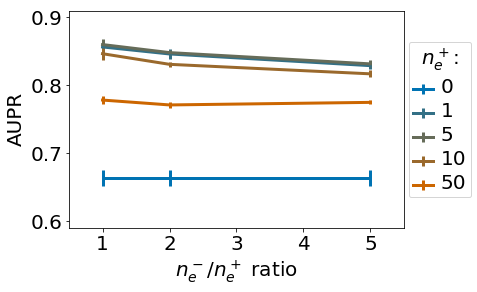

[0.66367980106800895, 0.66367980106800895, 0.66367980106800895]
[0.63827770381334803, 0.63827987583748347, 0.66061848684618629]
[0.6577225756158499, 0.659763502801888, 0.6731426553347466]
[0.67550674342045069, 0.67061186883223922, 0.65646165391005717]
[0.69642028905913334, 0.70194884336273378, 0.70373673833776584]


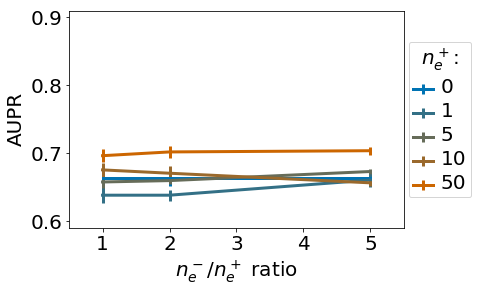

[0.70414394615282605, 0.70414394615282605, 0.70414394615282605]
[0.85604397701687174, 0.85220743970979063, 0.8366427346761085]
[0.86660446555053472, 0.85719649336635473, 0.84530422947267891]
[0.85683738930695064, 0.84807897764380724, 0.8330071277747424]
[0.79560157148956479, 0.79249893514890102, 0.79331076261325295]


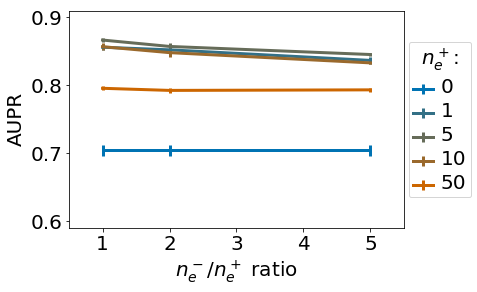

[0.70414394615282605, 0.70414394615282605, 0.70414394615282605]
[0.67174648862511588, 0.67070179743633906, 0.69040558847827849]
[0.69262381789275995, 0.68889868330714454, 0.71595679533822565]
[0.70554262829959469, 0.7020801598868619, 0.68550191086728363]
[0.71579490673658452, 0.72047930903969815, 0.71129274131476483]


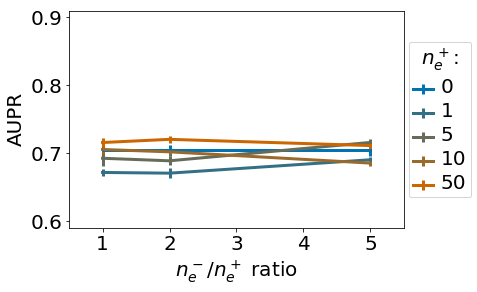

[0.72296930549821314, 0.72296930549821314, 0.72296930549821314]
[0.85517525979817743, 0.85080578688424857, 0.83990705897762852]
[0.86826700044019078, 0.8628714555683854, 0.84848677893083191]
[0.86242388938004289, 0.85295655304720919, 0.84545943751336972]
[0.80685429564625233, 0.80421745976792081, 0.79964044491608188]


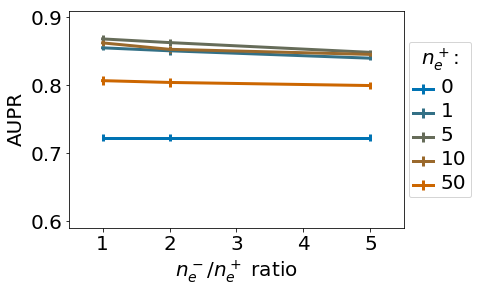

[0.72296930549821314, 0.72296930549821314, 0.72296930549821314]
[0.68842758673671867, 0.68912566702648759, 0.71759872014777637]
[0.71553540211735367, 0.71069267769267586, 0.7409997010091125]
[0.72358321043234386, 0.72140865355331596, 0.71613440305976095]
[0.7439438739463361, 0.74144328319234798, 0.71767002782063449]


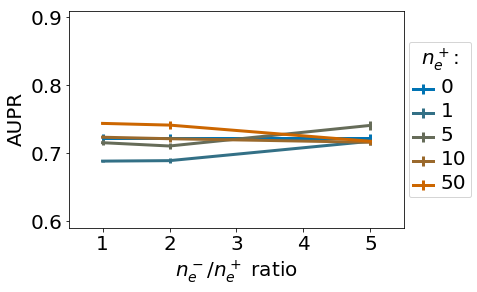

[0.7554693418718903, 0.7554693418718903, 0.7554693418718903]
[0.86120571688761993, 0.85762361515333052, 0.84874786977940453]
[0.86979581342853896, 0.86521290912278981, 0.87514240981682045]
[0.8681752568649902, 0.86018135363159709, 0.87244490052708845]
[0.82721885255334626, 0.8273488111924252, 0.81659288835128441]


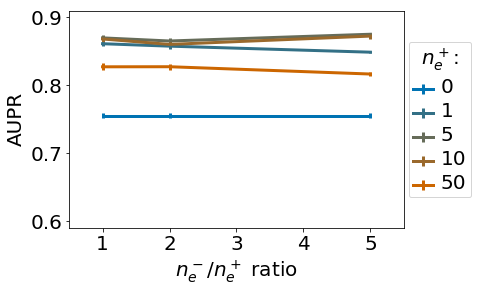

[0.7554693418718903, 0.7554693418718903, 0.7554693418718903]
[0.72154875308094879, 0.72352610245352578, 0.75508795968462628]
[0.74573992123425092, 0.75732309299038647, 0.78460214368883197]
[0.75782008561161218, 0.75096028831009209, 0.77426535618289893]
[0.76938240073804809, 0.7591230730804146, 0.75311109575334945]


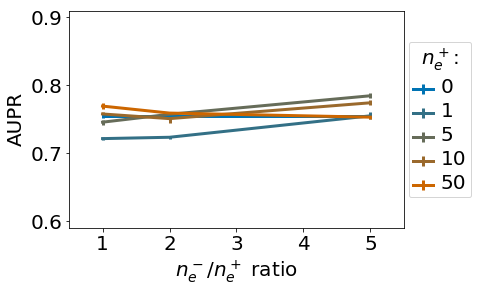

['1', '2', '5']
[0.66367980106800895, 0.70414394615282605, 0.72296930549821314, 0.7554693418718903]
[0.84649814929113965, 0.85683738930695064, 0.86242388938004289, 0.8681752568649902]
[0.67550674342045069, 0.70554262829959469, 0.72358321043234386, 0.75782008561161218]


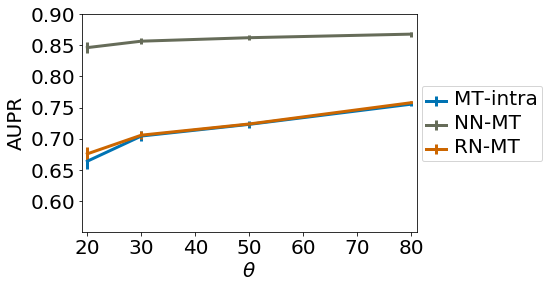

In [16]:
for type_clf in list_type_of_clf_MT:
    for type_of_SingleTask in list_type_of_SingleTask_MT:
        for type_threshold in list_type_threshold:
            for threshold in list_threshold:
                for script in list_script_MT:
                    if script=='MultiNeerestNeiLOOCV':
                        add_legend = 'NN'
                    else:
                        add_legend = 'RN'

                    legend_title = r'$n_e^+$:'
                    for NbNeg in list_NbNeg_MT:
                        list_of_list_of_auc_local = []
                        list_of_list_of_auc_local_stdev = []
                        list_of_list_of_aupr_local = []
                        list_of_list_of_aupr_local_stdev = []

                        list_nom = []

                        for nb_pos in list_nb_pos:
                            list_of_list_of_auc_local.append(dico_auc_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                            list_of_list_of_auc_local_stdev.append(dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                            list_of_list_of_aupr_local.append(dico_aupr_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                            list_of_list_of_aupr_local_stdev.append(dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                            if nb_pos=='ST':
                                list_nom.append("0")
                            else:
                                list_nom.append(str(nb_pos))

                        #dico_plot = {'pp':None, 'f_out':None}
                        #if plot_option=="save" or plot_option=="print_and_save":
                        #    dico_plot['pp'] = PdfPages('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_NbNegInTain.pdf')
                        #    dico_plot['f_out'] = open('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_NbNegInTain.txt', 'w')
                        #legend = plot_score_curve(script+' t:'+str(threshold)+' AUC', list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, \
                        #                 list_nb_neg, 'auc', 'nb_neg/nb_pos ratio of extra-task train', \
                        #                 list_nom, legend_title, plot_option, **dico_plot)
                        #if plot_option=="save" or plot_option=="print_and_save":
                        #    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                        #    dico_plot['pp'].close()
                        #    dico_plot['f_out'].close()
                        #if plot_option=="print" or plot_option=="print_and_save":
                        #    plt.show()  

                        dico_plot = {'pp':None, 'f_out':None}
                        if plot_option=="save" or plot_option=="print_and_save":
                            dico_plot['pp'] = PdfPages('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_NbNegInTain.pdf')
                            dico_plot['f_out'] = open('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_NbNegInTain.txt', 'w')
                        legend = plot_score_curve('', list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, \
                                         list_nb_neg, r'AUPR', r'$n_e^-/n_e^+$ ratio', \
                                         list_nom, legend_title, plot_option, **dico_plot)
                        plt.ylim([0.59,0.91])
                        plt.yticks(np.arange(0.6,0.9,0.1))
                        plt.xlim([0.5,5.5])
                        if plot_option=="save" or plot_option=="print_and_save":
                            plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                            dico_plot['pp'].close()
                            dico_plot['f_out'].close()
                        if plot_option=="print" or plot_option=="print_and_save":
                            plt.show()        




            for NbNeg in list_NbNeg_MT:
                nb_pos = '10'
                nb_neg = '1'
                NbNeg='10'
                print(list_nb_neg)
                index_nb_neg = list_nb_neg.index('1')
                list_of_list_of_auc_local = []
                list_of_list_of_auc_local_stdev = []
                list_of_list_of_aupr_local = []
                list_of_list_of_aupr_local_stdev = []

                list_nom = ['MT-intra','NN-MT', 'RN-MT']

                nb_pos = 'ST'
                script = 'MultiNeerestNeiLOOCV'
                list_of_list_of_auc_local.append([dico_auc_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_auc_local_stdev.append([dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_aupr_local.append([dico_aupr_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_aupr_local_stdev.append([dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])

                nb_pos = '10'
                list_of_list_of_auc_local.append([dico_auc_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_auc_local_stdev.append([dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_aupr_local.append([dico_aupr_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_aupr_local_stdev.append([dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])

                script = 'MultiRandomNeiLOOCV'
                list_of_list_of_auc_local.append([dico_auc_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_auc_local_stdev.append([dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_aupr_local.append([dico_aupr_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])
                list_of_list_of_aupr_local_stdev.append([dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold][index_nb_neg] for threshold in list_threshold])

                #dico_plot = {'pp':None, 'f_out':None}
                #if plot_option=="save" or plot_option=="print_and_save":
                #    dico_plot['pp'] = PdfPages('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_centile.pdf')
                #    dico_plot['f_out'] = open('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_centile.txt', 'w')
                #legend = plot_score_curve('AUC', list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, \
                #                 list_threshold, 'auc', 'similarity threshold in centile for intra-task pairs', \
                #                 list_nom, '', plot_option, **dico_plot)
                #if plot_option=="save" or plot_option=="print_and_save":
                #    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                #    dico_plot['pp'].close()
                #    dico_plot['f_out'].close()
                #if plot_option=="print" or plot_option=="print_and_save":
                #    plt.show()

                dico_plot = {'pp':None, 'f_out':None}
                if plot_option=="save" or plot_option=="print_and_save":
                    dico_plot['pp'] = PdfPages('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_centile.pdf')
                    dico_plot['f_out'] = open('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_centile.txt', 'w')
                legend = plot_score_curve('', list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, \
                                 list_threshold, r'AUPR', r'$\theta$', \
                                 list_nom, '', plot_option, **dico_plot)
                plt.ylim([0.55,0.9])
                plt.yticks(np.arange(0.6,0.9,0.05))
                if plot_option=="save" or plot_option=="print_and_save":
                    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                    dico_plot['pp'].close()
                    dico_plot['f_out'].close()
                if plot_option=="print" or plot_option=="print_and_save":
                    plt.show()


In [19]:
list_script_MT = ['MultiNeerestNeiLOOCV', 'MultiRandomNeiLOOCV']
list_type_of_SingleTask_MT = ['Kron']
list_type_of_clf_MT = ['SVM']
list_nb_pos = ['1','5','10', '50']
list_nb_neg = ['1','2','5']
list_NbNeg_MT = ['10']
list_threshold = ['20','80']
list_type_threshold = ['Sd']
ajout = '+' ## '' '_bis' '_xer' '_ter' 'all' '+'

dico_auc_type_SingleTask_MT, dico_auc_stdev_type_SingleTask_MT,\
dico_aupr_type_SingleTask_MT, dico_aupr_stdev_type_SingleTask_MT =\
load_MTminus_results(list_script_MT, list_type_of_SingleTask_MT, list_type_of_clf_MT, list_NbNeg_MT, \
                     list_nb_pos, list_nb_neg, list_type_threshold, list_threshold, ajout, {}, {}, {}, {})



[0.63391526815051624, 0.64152611435253792, 0.65874756619496411]
[0.64626219464328516, 0.64980056854327928, 0.66022095191422381]
[0.65641163928042456, 0.65607290161055387, 0.64525524917023069]
[0.64881095174807357, 0.64243878060145021, 0.63035079389821813]


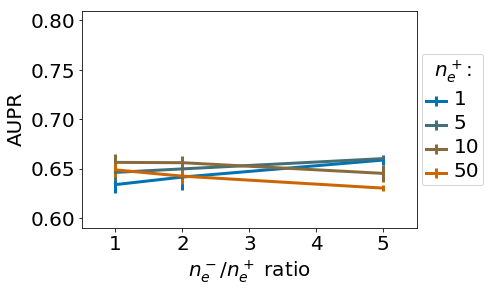

[0.62995724798157149, 0.64235864473564597, 0.65986081170194577]
[0.65677470687535688, 0.64525234397875986, 0.6726813512827674]
[0.66009313686417515, 0.64392534708465399, 0.62990261766013056]
[0.6644962115852342, 0.65748586966857014, 0.62228498686055644]


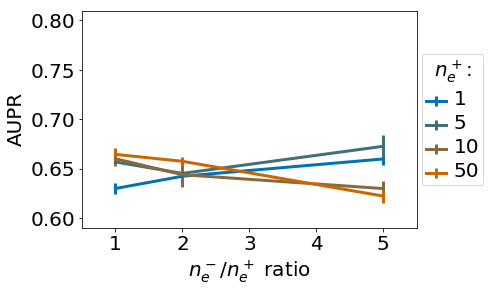

[0.72138117632859533, 0.71914189193590516, 0.75649761650893221]
[0.73348943586819093, 0.75500247673849341, 0.77583134759468519]
[0.7388151677376037, 0.73828669862655594, 0.75895714421265636]
[0.72493443094873089, 0.72152745528731266, 0.70720351842466223]


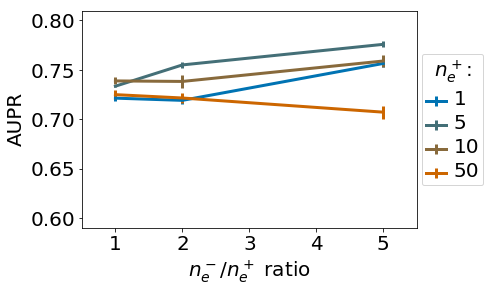

[0.72425145759545173, 0.71986096410709266, 0.75483711947495302]
[0.73924974554322143, 0.7548294035048797, 0.78101162764866006]
[0.74501539861898214, 0.73773953971129003, 0.76699755314630558]
[0.73168737744355838, 0.71743138833130937, 0.69137979132584115]


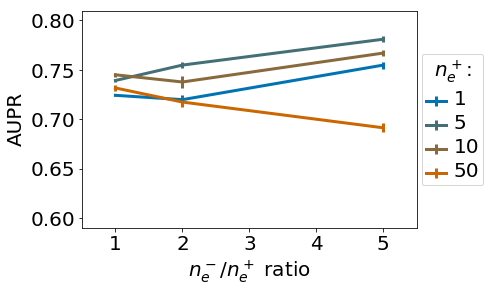

In [21]:
for type_clf in list_type_of_clf_MT:
    for type_of_SingleTask in list_type_of_SingleTask_MT:
            for type_threshold in list_type_threshold:
                for threshold in list_threshold:
                    for script in list_script_MT:
                        if script=='MultiNeerestNeiLOOCV':
                            add_legend = 'NN'
                        else:
                            add_legend = 'RN'

                        legend_title = r'$n_e^+$:'
                        for NbNeg in list_NbNeg_MT:
                            list_of_list_of_auc_local = []
                            list_of_list_of_auc_local_stdev = []
                            list_of_list_of_aupr_local = []
                            list_of_list_of_aupr_local_stdev = []

                            list_nom = []

                            for nb_pos in list_nb_pos:
                                list_of_list_of_auc_local.append(dico_auc_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                                list_of_list_of_auc_local_stdev.append(dico_auc_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                                list_of_list_of_aupr_local.append(dico_aupr_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                                list_of_list_of_aupr_local_stdev.append(dico_aupr_stdev_type_SingleTask_MT[script][type_clf][type_of_SingleTask][NbNeg][nb_pos][type_threshold][threshold])
                                if nb_pos=='ST':
                                    list_nom.append("0")
                                else:
                                    list_nom.append(str(nb_pos))
                                    
                            #dico_plot = {'pp':None, 'f_out':None}
                            #if plot_option=="save" or plot_option=="print_and_save":
                            #    dico_plot['pp'] = PdfPages('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_NbNegInTain.pdf')
                            #    dico_plot['f_out'] = open('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUC_depending_on_NbNegInTain.txt', 'w')
                            #legend = plot_score_curve(script+' t:'+str(threshold)+' AUC', list_of_list_of_auc_local, list_of_list_of_auc_local_stdev, \
                            #                 list_nb_neg, 'auc', 'nb_neg/nb_pos ratio of extra-task train', \
                            #                 list_nom, legend_title, plot_option, **dico_plot)
                            #if plot_option=="save" or plot_option=="print_and_save":
                            #    plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                            #    dico_plot['pp'].close()
                            #    dico_plot['f_out'].close()
                            #if plot_option=="print" or plot_option=="print_and_save":
                            #    plt.show()

                            dico_plot = {'pp':None, 'f_out':None}
                            if plot_option=="save" or plot_option=="print_and_save":
                                dico_plot['pp'] = PdfPages('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_NbNegInTain.pdf')
                                dico_plot['f_out'] = open('saved_results/plots/ST/Multi_minus'+ajout+'_'+script+'_'+type_threshold+':'+str(threshold)+'_'+type_of_SingleTask+'_'+type_clf+'_AUPR_depending_on_NbNegInTain.txt', 'w')
                            legend = plot_score_curve('', list_of_list_of_aupr_local, list_of_list_of_aupr_local_stdev, \
                                             list_nb_neg, r'AUPR', r'$n_e^-/n_e^+$ ratio', \
                                             list_nom, legend_title, plot_option, **dico_plot)
                            plt.ylim([0.59,0.81])
                            plt.yticks(np.arange(0.6,0.81,0.05))
                            plt.xlim([0.5,5.5])
                            if plot_option=="save" or plot_option=="print_and_save":
                                plt.savefig(dico_plot['pp'], format='pdf', bbox_extra_artists=(legend,), bbox_inches='tight')
                                dico_plot['pp'].close()
                                dico_plot['f_out'].close()
                            if plot_option=="print" or plot_option=="print_and_save":
                                plt.show()